# Logistic Regression

In [1]:
import pandas as pd

# Path to data file
parquet_file_path = '../../Costa_Rica_Data/Data Acquisition Output/extracted_gee_data/en_clean_gee_data.parquet'

# Load into a DataFrame
df = pd.read_parquet(parquet_file_path)

# Display head
df.head()

,plotid,sampleid,Use,CoverType,Vegetations,Herbaceous,GrasslandShrub,CropsType,WetlandArea,LandType,...,mTPI,ndvi,ocs_1mMed,sand_1mMed,savi,silt_1mMed,slope,topDiv,wetness,Forest_Presence
9,2902,11605,Wetlands,Vegetation,Trees,Not_Applicable,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.799771,68.0,332.15,0.393728,298.85,0.927410,1323.685053,-0.006312,Present
12,2902,11608,Grasslands,Vegetation,Herbaceous plants,Grasses,Mixed Pasture (70-90%),Not_Applicable,Not_Applicable,Not_Applicable,...,8129.0,0.796553,68.0,332.15,0.423713,298.85,2.935819,1323.685053,-0.014932,Present
13,2902,11609,Wetlands,Vegetation,Herbaceous plants,Grasses,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.644415,65.0,340.45,0.380250,304.70,0.944368,1323.685053,-0.001697,Present
15,2902,11611,Grasslands,Vegetation,Herbaceous plants,Grasses,Mixed Pasture (70-90%),Not_Applicable,Not_Applicable,Not_Applicable,...,8129.0,0.784331,68.0,332.15,0.512687,298.85,0.927410,1323.685053,-0.027987,Present
16,2902,11612,Wetlands,Vegetation,Trees,Not_Applicable,Not_Applicable,Not_Applicable,Swamp (Marsh),Not_Applicable,...,8129.0,0.769357,65.0,340.45,0.360428,304.70,2.645556,1323.685053,-0.009912,Present


In [2]:
y = df['Use']  # Set the target variable
X = df[['BLUE','GREEN', 'NIR', 'RED', 'SWIR1', 'SWIR2', 'altura2', 'aspect',
       'aspectcos', 'aspectdeg', 'brightness', 'clay_1mMed',
       'diff', 'elevation', 'evi', 'fpar', 'hand30_100', 'lai', 'mTPI', 'ndvi',
       'ocs_1mMed', 'sand_1mMed', 'savi', 'slope', 'topDiv',
       'wetness']]  # Predictor features

# Check the result
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")
X.head()

X shape: (91917, 26)
y shape: (91917,)


,BLUE,GREEN,NIR,RED,SWIR1,SWIR2,altura2,aspect,aspectcos,aspectdeg,...,hand30_100,lai,mTPI,ndvi,ocs_1mMed,sand_1mMed,savi,slope,topDiv,wetness
9,0.015077,0.036610,0.219815,0.024455,0.111190,0.042990,21.0,180.000000,0.540302,1.000000,...,2.0,0.305,8129.0,0.799771,68.0,332.15,0.393728,0.927410,1323.685053,-0.006312
12,0.017690,0.039745,0.246793,0.027947,0.132750,0.053138,18.0,341.251312,0.122567,1.447920,...,3.0,0.305,8129.0,0.796553,68.0,332.15,0.423713,2.935819,1323.685053,-0.014932
13,0.046950,0.063588,0.266593,0.057648,0.136132,0.075028,21.0,90.000000,0.731689,0.750000,...,0.0,0.260,8129.0,0.644415,65.0,340.45,0.380250,0.944368,1323.685053,-0.001697
15,0.022943,0.057262,0.344528,0.041642,0.190775,0.083415,15.0,0.000000,0.877583,0.500000,...,4.0,0.305,8129.0,0.784331,68.0,332.15,0.512687,0.927410,1323.685053,-0.027987
16,0.013152,0.031413,0.200895,0.026188,0.103023,0.047857,22.0,314.480835,0.195962,1.373558,...,2.0,0.260,8129.0,0.769357,65.0,340.45,0.360428,2.645556,1323.685053,-0.009912


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=30, test_size=0.2)

In [4]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

/home/sam/miniconda3/envs/mlenv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [5]:
y_prediction = model.predict(X_test)

In [6]:
model.score(X_test, y_test)

0.5714208006962577

#### Transform the predictor variables using a PCA and determine how many components are required to account for 95% of the total variation.

95% of the covariation can be explained using the first 12 components


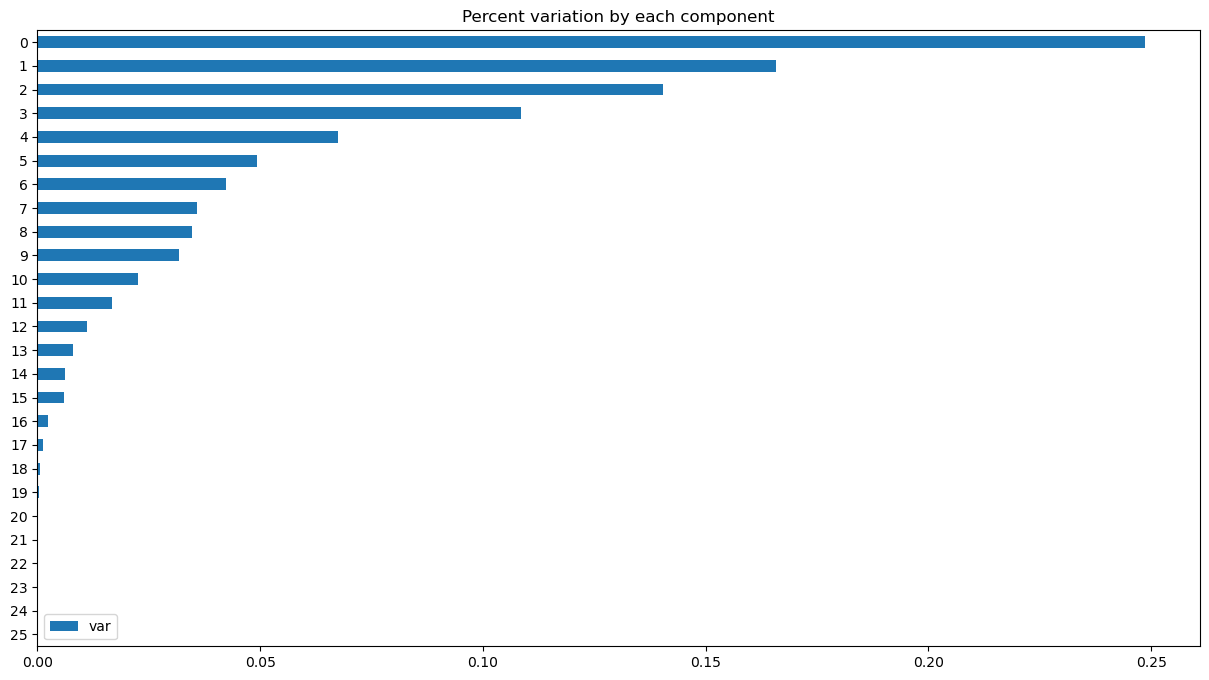

In [7]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ss=StandardScaler(with_mean=False) #scaling data without centering on the mean because PCA will center the data.
ss.fit(X)
X2=ss.transform(X) # scaling our values so they are comparable

pca = PCA()
pca.fit(X2) # fit the PCA on scaled values
vexp=pd.DataFrame(pca.explained_variance_ratio_,columns=['var']) # get the proportion of variance explained by each component

#find the number of components needed to account for 95% of the variation in the data
cmp=0
s=0
for v in vexp['var']:
    s+=v
    cmp+=1
    if(s>0.95):break
    
#plot % covariance explained
print('95% of the covariation can be explained using the first',cmp,'components')
vexp.plot(kind='barh',figsize=(15,8),title='Percent variation by each component').invert_yaxis()

### Transform our predictors into independent components.

In [8]:
#get our components
X3=pca.transform(X2) #what if we wanted to subset the components to the top 13? How would we do that?

#### Building our first saturated multinominal logistic regression model and calculate overall accuracy.

In [10]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#create our saturated logistic regression model
lg = LogisticRegression(random_state=30,solver='lbfgs',max_iter=1000) #increased the iteration so that the model can converge
lg.fit(X3,y)

# Get predicted probabilities of our training data
# Logistic regression models actually estimate each category's probability of occurrence. Using those class probabilities we can label records using a set of rules.
# By default, the predict function in sklearn's logistic class assigns class labels based on the most probable class (maximum likelihood class).

#Let's calculate class accuracy
pred_lbl=lg.predict(X3)
print("% Overall accurate:",accuracy_score(y,pred_lbl))

% Overall accurate: 0.7195186962150636
